# Import library

In [36]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Read dataset

In [37]:
data = pd.read_csv("/home/quan/PROJECT/Data-Mining-Project/data/kaggle_dataset/summer-products-with-rating-and-performance_2020-08.csv")
data.head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


In [38]:
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [39]:
data.shape

(1573, 43)

# Data Cleaning

## Drop unecessary columns

In [40]:
columns_to_drop = ['title','currency_buyer', 'product_color', 'product_variation_size_id', 'product_variation_inventory', 'shipping_option_name', 'inventory_total', 'urgency_text', 'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id', 'product_url', 'product_picture', 'product_id', 'theme', 'crawl_month', 'merchant_profile_picture']

- Excluded **product color** and **size** because it's just showing the ones that were found in getting the data : there are more colors and sizes for each product so having just one for each category doesn't say much.
- Excluded **currency used**, as every price is in EUR
- Excluded **shipping option**, the "shipping_is_express" column is enough.
- Excluded **product's** and **merchant's id's and pictures**, that won't be needed.

In [41]:
data.drop(columns=columns_to_drop, inplace=True)

In [42]:
data.columns

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')

## Missing value

In [43]:
data.isnull().sum()

title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
has_urgency_banner              1100
merchant_rating_count              0
merchant_rating                    0
merchant_has_profile_picture       0
dtype: int64

- Exactly 45 for rating counts from 1 to 5 star, could it be that there are products with no ratings at all?
- 1100 null values in the has urgency banner : the values there are 1's so the null values should be turned into 0's

In [44]:
data = data.rename(columns={'has_urgency_banner': 'is_running_out',
                       'title_orig': 'title'})
#fix the running out column
data['is_running_out'] = data['is_running_out'].fillna(0)

data[data['rating_five_count'].isna()][['rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']].isna().sum()

rating_four_count     45
rating_three_count    45
rating_two_count      45
rating_one_count      45
dtype: int64

We see the null values in the rating are actually of the same 45 products

In [45]:
data[data['rating_five_count'].isna()].sample(10)

,title,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,badge_product_quality,badge_fast_shipping,tags,shipping_option_price,shipping_is_express,countries_shipped_to,is_running_out,merchant_rating_count,merchant_rating,merchant_has_profile_picture
1127,Women Ladies Fashion Plus Size Daisy Sleeveles...,7.00,31,8,0,5.0,0,NaN,NaN,NaN,...,0,0,"Plus Size,Shirt,Tops,Women's Fashion,Fashion,s...",2,0,43,0.0,53225,3.949159,0
481,Women Crop Tops Deep V Neck Sleeveless Slim Fi...,9.00,34,50,0,5.0,0,NaN,NaN,NaN,...,0,0,"Deep V-Neck,Summer,Vest,Slim Fit,crop top,Neck...",3,0,41,0.0,14676,4.074203,0
976,Summer 2020 New Loose Floral Print Sleeveless ...,7.00,66,10,1,5.0,0,NaN,NaN,NaN,...,0,0,"Summer,Plus Size,Floral print,Dresses,Spring,D...",2,0,41,0.0,3694,4.042231,1
1192,Women Summer Half Sleeve Irregular Hem Bohemia...,16.00,14,10,1,5.0,0,NaN,NaN,NaN,...,0,0,"bohodressesforwoman,irregularhemdre,Sleeve,Sum...",4,0,40,0.0,1442,4.466019,0
618,Women's Active Skort Athletic Stretchy Pleated...,5.00,5,10,0,5.0,0,NaN,NaN,NaN,...,0,0,"ladies skort,running skirt,summer skirt,Golf,s...",2,0,8,0.0,129,3.837209,0
375,Vintage Kawaii Harajuku T Shirt Women Ullzang ...,8.00,17,10,0,5.0,0,NaN,NaN,NaN,...,0,0,"90sfashion,Summer,Fashion,Princess,cute,Kawaii...",3,0,48,1.0,8,3.625000,0
1270,Butterfly Print Cotton Face Mask Outdoor Sport...,2.67,67,10,0,5.0,0,NaN,NaN,NaN,...,0,0,"butterfly,Summer,Outdoor,isolation,Masks,Sport...",1,0,27,0.0,13,3.692308,0
346,2020 New Women Summer Fashion O-neck Sleevele...,8.00,7,10,1,5.0,0,NaN,NaN,NaN,...,0,0,"Summer,Slim Fitting,Tank,summer tank top,Tops...",3,0,10,0.0,27175,3.966035,0
774,Personal Fan USB Rechargeable Hands Free Neckb...,16.00,16,2,0,5.0,0,NaN,NaN,NaN,...,0,0,"Mini,Summer,portablefan,usb,minifan,Rechargeab...",5,0,32,0.0,693,4.303030,0
732,2020 New Women Summer Fashion O-neck Sleevele...,8.00,7,10,1,5.0,0,NaN,NaN,NaN,...,0,0,"Summer,Slim Fitting,Tank,summer tank top,Tops...",3,0,10,1.0,27175,3.966035,0


They seem to be having a rating of 5 even with no ratings: we are going to change the rating and all the rating counts to 0

In [46]:
# Change rating to 0 
data.loc[data['rating_five_count'].isna(), 'rating'] = 0
data.loc[data['rating_five_count'].isna(), ['rating_five_count',
                                        'rating_four_count', 'rating_three_count',
                                       'rating_two_count', 'rating_one_count']] = 0

In [47]:
# Double check
data.isna().sum()

title                           0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
is_running_out                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

# Data Exploration

## Successful Products

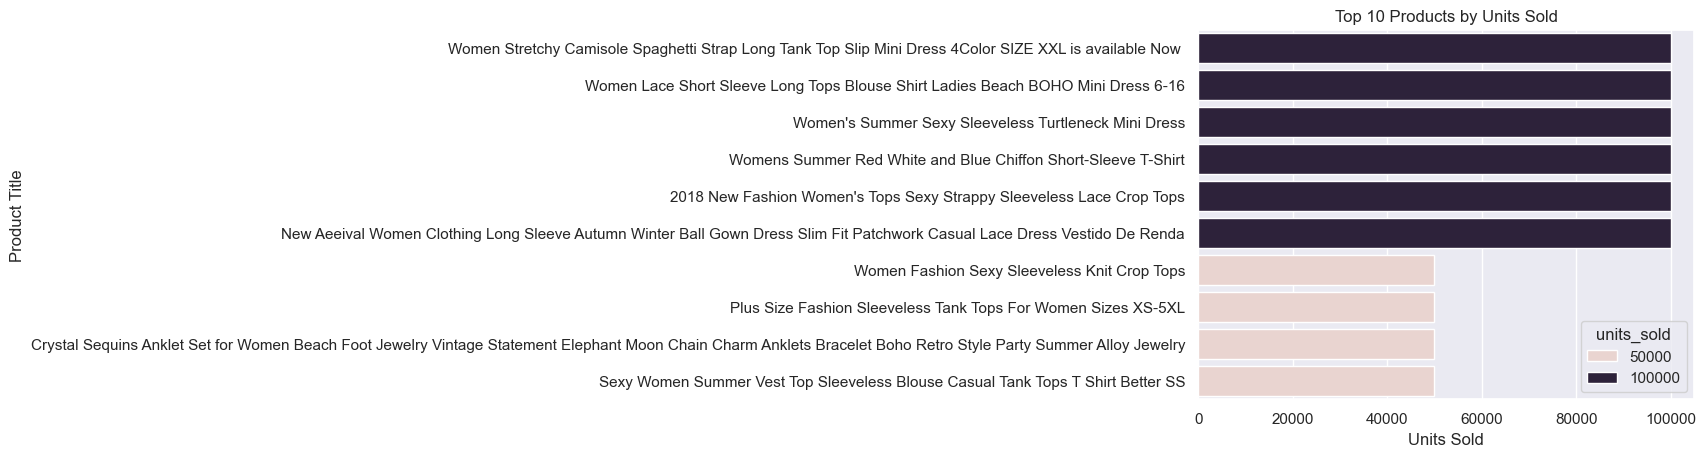

In [48]:
top_10_products = data.sort_values(by='units_sold', ascending=False).head(10)
sns.barplot(x='units_sold', y='title', data=top_10_products, hue='units_sold')
plt.xlabel('Units Sold')
plt.ylabel('Product Title')
plt.title('Top 10 Products by Units Sold')
plt.show()

- Most selling products are **mini dresses** and **bikinis**
- The words **sexy** is repeated many times

## Units_sold

In [49]:
data['units_sold'].unique()

array([   100,  20000,   5000,     10,  50000,   1000,  10000, 100000,
           50,      1,      7,      2,      3,      8,      6])

It seems like they are all numbers approximated to their lower bound. So let's pretend they are divided in ranges like this:

- 10-100
- 100-1000
- 1000-5000
- 5000-10000
- 10000-20000
- 20000-50000
- 50000-100000
- 100000+


Round the numbers below 10 to 100000 and define 3 performance characteristics:
1. **Average**: 10-1000
2. **Successful**: 1000-20000
3. **Very Successful**: 20000+

/tmp/ipykernel_5416/1383445016.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranges, y=units_count, palette='mako')


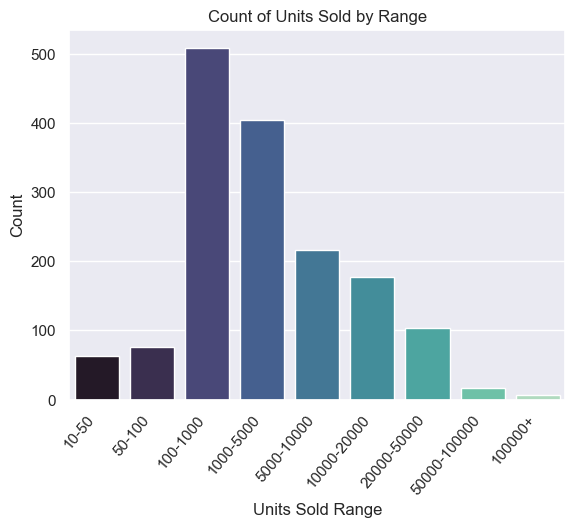

In [50]:
#round to 10
data.loc[data['units_sold'] < 10, 'units_sold'] = 10
units = np.sort(data['units_sold'].unique())

# Units sold by range
ranges = ['10-50','50-100','100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '100000+']
def find_units_count():
    units_array = []
    for x in units:
        times = data.loc[data['units_sold'] == x, 'units_sold'].count()
        units_array.append(times)
    return units_array

units_count = find_units_count()
units_count

sns.barplot(x=ranges, y=units_count, palette='mako')
plt.title('Count of Units Sold by Range')
plt.xlabel('Units Sold Range')
plt.ylabel('Count')

plt.xticks(rotation=50, ha='right')
plt.show()


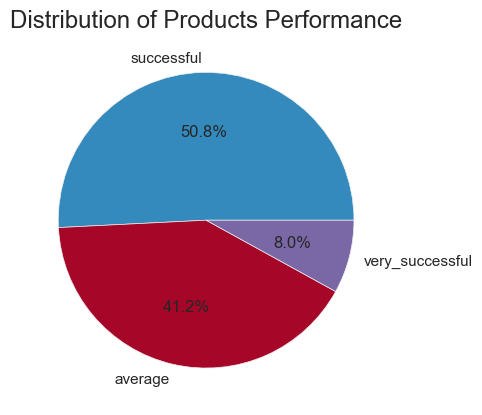

In [51]:
#average if < 1000, successful if  1000<=x<20000 ,very successful >=20000
data['performance'] = data['units_sold'].apply(lambda x: 'average' if x < 1000 
                                           else ('successful' if x < 20000 else 'very_successful'))
#pie plot
plt.style.use('bmh')
counts = data['performance'].value_counts()
plt.pie(counts, autopct='%1.1f%%', labels = counts.index)
plt.title('Distribution of Products Performance')
plt.show()

- Majority of products in the dataset are between the **100-1000** and the **1000-5000** range, but what surprises me the most is that there are more products with 5000-10000 units sold than 50-100 units sold: seems like these summer products are selling well!
- **50%** of the products are successful based on the filters i put, but is there something different between average, sucessful and very successful products?

## Impact of rating success

In [52]:
data.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'is_running_out',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'performance'],
      dtype='object')

In [53]:
data[['title','rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count']]

,title,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,3.76,54,26.0,8.0,10.0,1.0,9.0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0
2,2020 New Arrival Women Spring and Summer Beach...,3.57,14,5.0,4.0,2.0,0.0,3.0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,4.03,579,295.0,119.0,87.0,42.0,36.0
4,Women Summer Shorts Lace Up Elastic Waistband ...,3.10,20,6.0,4.0,2.0,2.0,6.0
...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,4.08,1367,722.0,293.0,185.0,77.0,90.0
1569,10 Color Women Summer Shorts Lace Up Elastic W...,3.07,28,11.0,3.0,1.0,3.0,10.0
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,3.71,59,24.0,15.0,8.0,3.0,9.0
1571,Fashion Women Summer Sleeveless Dresses V Neck...,2.50,2,0.0,1.0,0.0,0.0,1.0


- Some products have a rating count that's too low to be considered, let's only look at products with more than 150 ratings to try to have a fair result
- The rating of the products is a decimal number: let's create another column that categorizes each product into it's rating range.

In [54]:
data_ratings = data[data['rating_count'] > 100]
data_ratings = data_ratings[['title','price', 'retail_price', 'units_sold','rating', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count','performance']]
data_ratings['rating_count'].count()

np.int64(876)

We have `876 products` so that's a good amount to work with

In [55]:
data_ratings['rating_range'] = data_ratings['rating'].apply(lambda x: '< 1' if x < 1 
                                           else '1-2' if x < 2 
                                           else '2-3' if x < 3
                                           else '3-4' if x < 4
                                           else '4-5')
data_ratings['rating_range'].value_counts()

rating_range
3-4    536
4-5    331
2-3      9
Name: count, dtype: int64

We see something strange, there are only `9 products` in the 2-3 range and nothing below that range when we filter for more than 100 ratings. Let's just display the 3-4 and 4-5 ranges results.

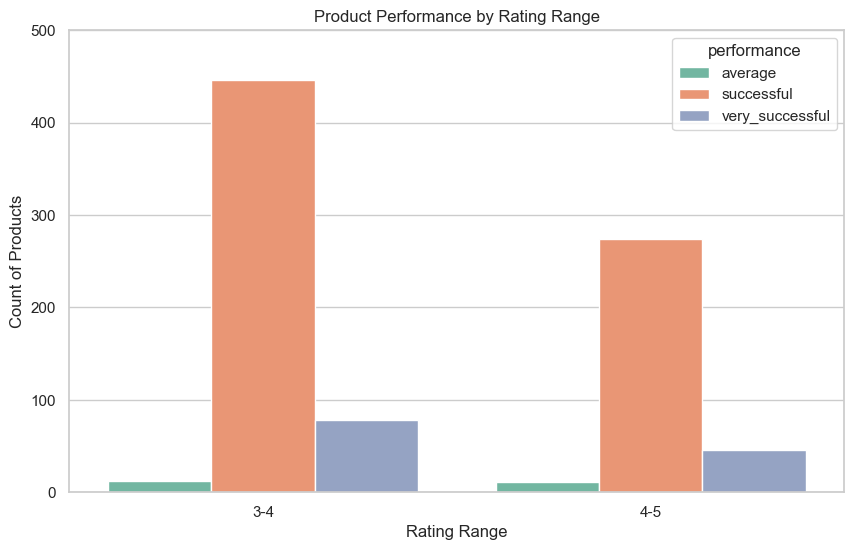

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
data_grouped = data_ratings.groupby(['rating_range', 'performance']).size().reset_index(name='counts')
data_grouped = data_grouped[data_grouped['rating_range'] != '2-3']
# Plot the data with hue based on 'performance'
sns.barplot(x='rating_range', y='counts', hue='performance', data=data_grouped, palette='Set2')
plt.ylim(0, 500)
# Add labels and title
plt.xlabel('Rating Range')
plt.ylabel('Count of Products')
plt.title('Product Performance by Rating Range')

# Show the plot
plt.show()

**Even though the 2-3 range and below don't give us much information, we see that with over 100 reviews the products with 3+ rating have a really good chance to be successful, being that it gives faith to the customer that they will probably like the product if other people already did.**

## Impact of Merchant Reputation

In [57]:
data.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'is_running_out',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'performance'],
      dtype='object')

Columns that are important are: *merchant_rating_count*, *merchant_rating* and *merchant_has_profile_picture*

performance
average            13630.348765
successful         28667.486859
very_successful    78890.134921
Name: merchant_rating_count, dtype: float64


/tmp/ipykernel_5416/410751461.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', len(average_ratings))


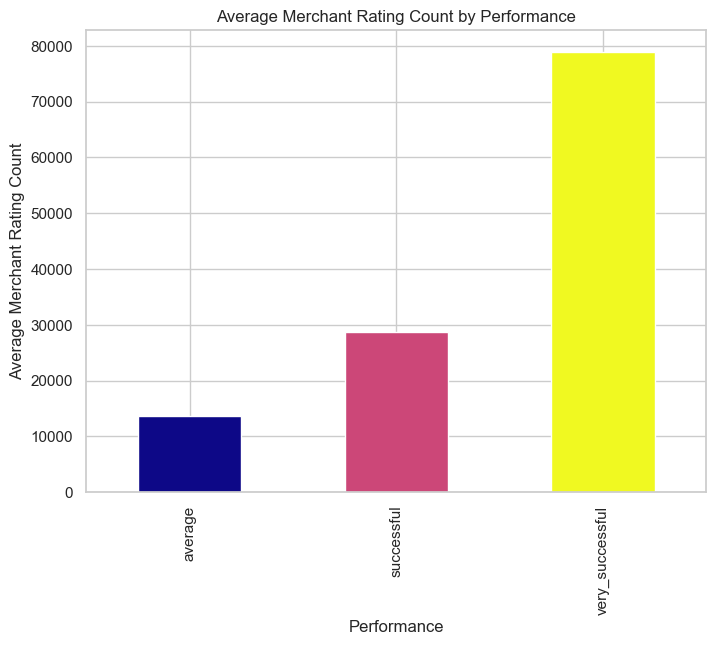

In [58]:
average_ratings = data.groupby('performance')['merchant_rating_count'].mean()
print(average_ratings)

cmap = cm.get_cmap('plasma', len(average_ratings))
colors = cmap(np.linspace(0, 1, len(average_ratings)))
average_ratings.plot(kind='bar', color = colors, figsize=(8, 6))
plt.title('Average Merchant Rating Count by Performance')
plt.xlabel('Performance')
plt.ylabel('Average Merchant Rating Count')
plt.show()


The merchants with higher rating count have the best performance

In [59]:
print(data['merchant_rating'].min())
print(data['merchant_rating'].max())

2.333333333333333
5.0


In [60]:
data['merchant_rating_range'] = data['merchant_rating'].apply(lambda x: '0-1' if x < 1 
                                           else '1-2' if x < 2 
                                           else '2-3' if x < 3
                                           else '3-4' if x < 4
                                           else '4-5')
data['merchant_rating_range'].value_counts()

merchant_rating_range
4-5    931
3-4    640
2-3      2
Name: count, dtype: int64

Again, we just see 2 products in he 2-3 rating while the others are much higher

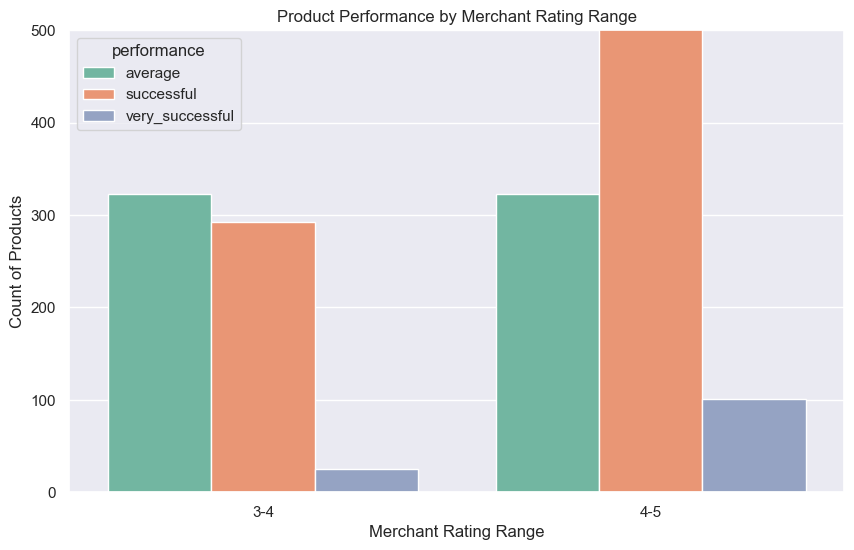

In [61]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
data_grouped = data.groupby(['merchant_rating_range', 'performance']).size().reset_index(name='counts')
data_grouped = data_grouped[data_grouped['merchant_rating_range'] != '2-3']
sns.barplot(x='merchant_rating_range', y='counts', hue='performance', data=data_grouped, palette='Set2')
plt.ylim(0, 500)

plt.xlabel('Merchant Rating Range')
plt.ylabel('Count of Products')
plt.title('Product Performance by Merchant Rating Range')

# Show the plot
plt.show()

We see that having higher merchant rating has significantly more importance on having successful and very successful products.

Check if having a profile picture somewhat helps with performance

In [62]:
print(data['merchant_has_profile_picture'].unique())

[0 1]


merchant_has_profile_picture    0    1
performance                           
average                       591   57
successful                    665  134
very_successful                91   35


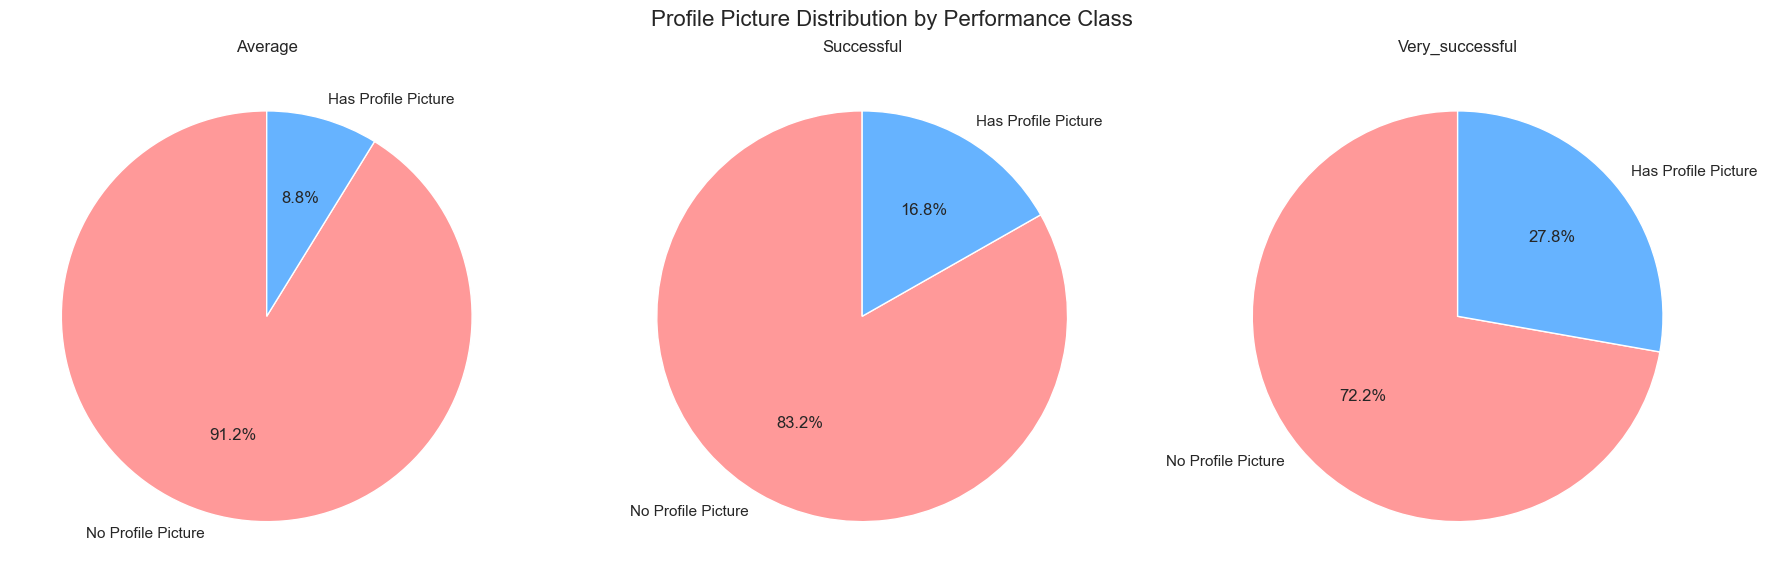

In [63]:
pfp = data.groupby(['performance', 'merchant_has_profile_picture']).size().unstack(fill_value=0)
print(pfp)
# Create subplots for each performance category
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
performance_classes = pfp.index  # Unique performance classes
for i, performance in enumerate(performance_classes):
    values = pfp.loc[performance]
    labels = ['No Profile Picture', 'Has Profile Picture']
    colors = ['#ff9999', '#66b3ff']  # Custom colors for the pie charts
    
    # Create pie chart
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'{performance.capitalize()}')

# Add a main title
plt.suptitle('Profile Picture Distribution by Performance Class', fontsize=16)
plt.tight_layout()
plt.show()

We see the more successful the product is, the more have a profile picture matters

## Impact of Badges, Banners and Shipping Options

In [64]:
data.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'is_running_out',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'performance', 'merchant_rating_range'],
      dtype='object')

<Axes: >

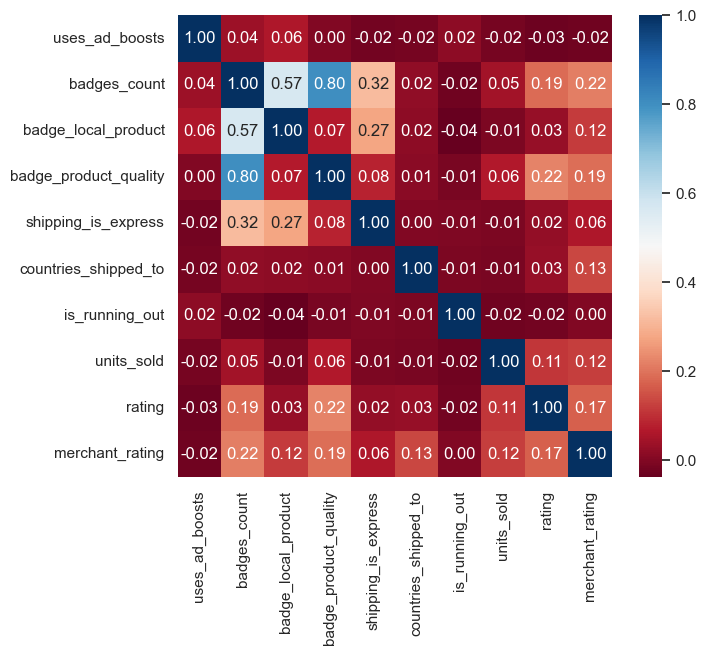

In [65]:
data_badges = data[['uses_ad_boosts','badges_count', 'badge_local_product', 'badge_product_quality',
                'shipping_is_express', 'countries_shipped_to','is_running_out',
                'units_sold','rating','merchant_rating']]
corr = data_badges.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr, cmap ="RdBu",annot = True,fmt=".2f")

- **Increasing Units Sold**: We see a weak positive correlation with rating and merchant rating, meaning improving customer reviews can boost sales.
- **Improve Rating**: Rating seems to be affected most by product quality badges, so it is important to use qualitative material to get that; furthermore we see merchant rating is affected more than rating by local product badge,meaning it's important to showcase the materials used for the product come from local suppliers and the numbers of countries product is shipped to,so if having a low merchant rating that's what you should focus on improving.


# Product Performance Target

In [66]:
# data['performance'] = data['performance'].apply(
#     lambda x: 1 if x == 'average' else 2 if x == 'successful' else 3
# )
# data['performance'] = data['performance'].astype('int64')

# Final Dataset

In [67]:
cleaned_data = data[['price', 'retail_price','rating', 
             'rating_count', 'badge_local_product', 'badge_product_quality',
            'shipping_is_express','countries_shipped_to',
             'merchant_rating_count', 'merchant_rating','merchant_has_profile_picture','performance']]

In [68]:
cleaned_data.head()

,price,retail_price,rating,rating_count,badge_local_product,badge_product_quality,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture,performance
0,16.00,14,3.76,54,0,0,0,34,568,4.128521,0,average
1,8.00,22,3.45,6135,0,0,0,41,17752,3.899673,0,very_successful
2,8.00,43,3.57,14,0,0,0,36,295,3.989831,0,average
3,8.00,8,4.03,579,0,0,0,41,23832,4.020435,0,successful
4,2.72,3,3.10,20,0,0,0,35,14482,4.001588,0,average


In [69]:
cleaned_data.describe()

,price,retail_price,rating,rating_count,badge_local_product,badge_product_quality,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,3.677858,889.659250,0.018436,0.074380,0.002543,40.456453,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,0.789466,1983.928834,0.134565,0.262472,0.050379,20.301203,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,3.500000,24.000000,0.000000,0.000000,0.000000,31.000000,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,3.810000,150.000000,0.000000,0.000000,0.000000,40.000000,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,4.080000,855.000000,0.000000,0.000000,0.000000,43.000000,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,5.000000,20744.000000,1.000000,1.000000,1.000000,140.000000,2.174765e+06,5.000000,1.000000


In [70]:
cleaned_data.to_csv('/home/quan/PROJECT/Data-Mining-Project/Model/data/cleaned_summer_products.csv', index=False)